#  Data Preprocessing

In [1]:
! pip install altair
import pandas as pd
import numpy as np
from sklearn import decomposition
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt

In [2]:
#Population code information, file name: igsr_populations.tsv from www.internationalgenome.org
dfPcode=pd.read_csv("igsr_populations.tsv",sep='\t')
dfPcode

,Population code,Population elastic ID,Population name,Population description,Population latitude,Population longitude,Superpopulation code,Superpopulation name,Superpopulation display colour,Superpopulation display order,Number of samples,Data collections
0,CHS,CHS,Southern Han Chinese,Han Chinese South,23.133330,113.266667,EAS,East Asian Ancestry,#778500,3,171,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC..."
1,FIN,FIN,Finnish,Finnish in Finland,60.170000,24.930000,EUR,European Ancestry,#018ead,4,105,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC..."
2,PUR,PUR,Puerto Rican,Puerto Rican in Puerto Rico,18.400000,-66.100000,AMR,American Ancestry,#710027,2,150,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC..."
3,KHV,KHV,Kinh Vietnamese,"Kinh in Ho Chi Minh City, Vietnam",10.780000,106.680000,EAS,East Asian Ancestry,#778500,3,124,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC..."
4,ACB,ACB,African Caribbean,African Caribbean in Barbados,13.100000,-59.620000,AFR,African Ancestry,#ffd845,1,123,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC..."
...,...,...,...,...,...,...,...,...,...,...,...,...
207,NaN,EstonianSGDP,Estonian,Estonian in Estonia (SGDP),58.500000,24.900000,NaN,West Eurasia (SGDP),#001f54,19,2,Simons Genome Diversity Project
208,NaN,SardinianSGDP,Sardinian,Sardinian in Italy (SGDP),40.000000,9.000000,NaN,West Eurasia (SGDP),#001f54,19,3,Simons Genome Diversity Project
209,NaN,DinkaSGDP,Dinka,Dinka in Sudan (SGDP),8.794444,27.400000,NaN,Africa (SGDP),#12eeff,13,3,Simons Genome Diversity Project
210,NaN,NaxiSGDP,Naxi,Naxi in China (SGDP),26.000000,100.000000,NaN,East Asia (SGDP),#ff48de,16,3,Simons Genome Diversity Project


In [3]:
# Matrix made by information in VCF file 
df_matrix=pd.read_csv("D:/Datasets/Chromosome8/matrix_chr8.csv")
df_matrix

,Unnamed: 0,rs186944105,rs7387067,rs7816944,rs57406844,rs61028689,rs181205188,rs190937652,rs12675741,rs190920769,...,rs144590680,rs111844098,rs192605073,rs11991644,rs201350395,rs111448606,rs151187129,rs72699368,rs183544688,Population code
0,HG00096,0,2,2,0,0,0,0,0,0,...,0,0,0,2,0,0,0,0,0,GBR
1,HG00097,0,2,2,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,GBR
2,HG00099,1,2,2,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,GBR
3,HG00100,0,2,2,0,0,0,0,0,0,...,0,0,0,2,0,0,0,0,0,GBR
4,HG00101,0,1,1,1,0,0,0,0,0,...,0,0,0,2,0,0,0,0,0,GBR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1087,NA20816,0,2,2,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,TSI
1088,NA20818,0,2,2,0,0,0,0,0,0,...,0,0,0,2,0,0,0,0,0,TSI
1089,NA20819,0,2,2,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,TSI
1090,NA20826,0,2,2,0,0,0,0,0,0,...,0,0,0,2,0,0,0,0,0,TSI


In [4]:
df_matrix.rename(columns={'Unnamed: 0': 'Sample id'}, inplace=True)

In [5]:
df_matrix

,Sample id,rs186944105,rs7387067,rs7816944,rs57406844,rs61028689,rs181205188,rs190937652,rs12675741,rs190920769,...,rs144590680,rs111844098,rs192605073,rs11991644,rs201350395,rs111448606,rs151187129,rs72699368,rs183544688,Population code
0,HG00096,0,2,2,0,0,0,0,0,0,...,0,0,0,2,0,0,0,0,0,GBR
1,HG00097,0,2,2,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,GBR
2,HG00099,1,2,2,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,GBR
3,HG00100,0,2,2,0,0,0,0,0,0,...,0,0,0,2,0,0,0,0,0,GBR
4,HG00101,0,1,1,1,0,0,0,0,0,...,0,0,0,2,0,0,0,0,0,GBR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1087,NA20816,0,2,2,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,TSI
1088,NA20818,0,2,2,0,0,0,0,0,0,...,0,0,0,2,0,0,0,0,0,TSI
1089,NA20819,0,2,2,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,TSI
1090,NA20826,0,2,2,0,0,0,0,0,0,...,0,0,0,2,0,0,0,0,0,TSI


In [9]:
df_matrix['Population code'].value_counts()

CHS    100
TSI     98
CHB     97
LWK     97
FIN     93
JPT     89
GBR     89
YRI     88
CEU     85
MXL     66
ASW     61
CLM     60
PUR     55
IBS     14
Name: Population code, dtype: int64

## Prepare for PCA

In [10]:
matrix=df_matrix.iloc[:,1:-1].to_numpy()
print(matrix.shape)
matrix

(1092, 21838)


array([[0, 2, 2, ..., 0, 0, 0],
       [0, 2, 2, ..., 0, 0, 0],
       [1, 2, 2, ..., 0, 0, 0],
       ...,
       [0, 2, 2, ..., 0, 0, 0],
       [0, 2, 2, ..., 0, 0, 0],
       [0, 2, 2, ..., 0, 0, 0]], dtype=int64)

In [11]:
pca = decomposition.PCA(n_components=2)
pca.fit(matrix)

PCA(n_components=2)

In [12]:
print(pca.explained_variance_ratio_)
print(pca.singular_values_)

[0.09105576 0.05101651]
[393.21894975 294.33106176]


In [13]:
plot_matrix=pca.transform(matrix)
plot_matrix.shape

(1092, 2)

In [14]:
df_plot=pd.DataFrame()
df_plot[['Sample id','Population code']]=df_matrix[['Sample id','Population code']]
df_plot['PC1']= plot_matrix[:,0]
df_plot['PC2']= plot_matrix[:,1]

In [15]:
df_plot

,Sample id,Population code,PC1,PC2
0,HG00096,GBR,-4.950083,-9.549704
1,HG00097,GBR,-6.138267,-11.006320
2,HG00099,GBR,-5.985660,-10.231324
3,HG00100,GBR,-5.837975,-8.957336
4,HG00101,GBR,-4.521309,-9.286968
...,...,...,...,...
1087,NA20816,TSI,-4.449573,-11.500223
1088,NA20818,TSI,-5.395529,-9.515454
1089,NA20819,TSI,-5.952242,-9.113308
1090,NA20826,TSI,-5.937006,-8.733424


In [17]:
df_merge=df_plot.merge(dfPcode, on='Population code',how='inner')
df_merge

,Sample id,Population code,PC1,PC2,Population elastic ID,Population name,Population description,Population latitude,Population longitude,Superpopulation code,Superpopulation name,Superpopulation display colour,Superpopulation display order,Number of samples,Data collections
0,HG00096,GBR,-4.950083,-9.549704,GBR,British,British in England and Scotland,52.486243,-1.890401,EUR,European Ancestry,#018ead,4,107,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC..."
1,HG00097,GBR,-6.138267,-11.006320,GBR,British,British in England and Scotland,52.486243,-1.890401,EUR,European Ancestry,#018ead,4,107,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC..."
2,HG00099,GBR,-5.985660,-10.231324,GBR,British,British in England and Scotland,52.486243,-1.890401,EUR,European Ancestry,#018ead,4,107,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC..."
3,HG00100,GBR,-5.837975,-8.957336,GBR,British,British in England and Scotland,52.486243,-1.890401,EUR,European Ancestry,#018ead,4,107,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC..."
4,HG00101,GBR,-4.521309,-9.286968,GBR,British,British in England and Scotland,52.486243,-1.890401,EUR,European Ancestry,#018ead,4,107,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1087,NA20816,TSI,-4.449573,-11.500223,TSI,Toscani,Toscani in Italy,42.100000,12.000000,EUR,European Ancestry,#018ead,4,112,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC..."
1088,NA20818,TSI,-5.395529,-9.515454,TSI,Toscani,Toscani in Italy,42.100000,12.000000,EUR,European Ancestry,#018ead,4,112,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC..."
1089,NA20819,TSI,-5.952242,-9.113308,TSI,Toscani,Toscani in Italy,42.100000,12.000000,EUR,European Ancestry,#018ead,4,112,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC..."
1090,NA20826,TSI,-5.937006,-8.733424,TSI,Toscani,Toscani in Italy,42.100000,12.000000,EUR,European Ancestry,#018ead,4,112,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC..."


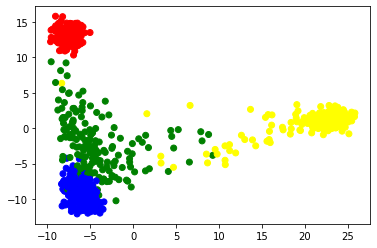

In [18]:
mydict={'EUR':'blue',
       'EAS':'red',
       'AFR':'yellow',
       'AMR':'green'}
plt.scatter(df_merge['PC1'],df_merge['PC2'],color=df_merge['Superpopulation code'].map(mydict))

<AxesSubplot:xlabel='PC1', ylabel='PC2'>

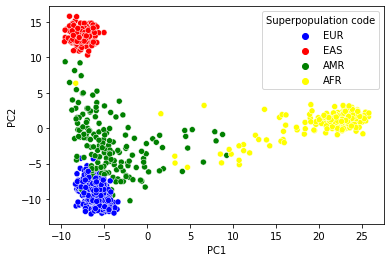

In [19]:
sns.scatterplot(data=df_merge,x='PC1',y='PC2',hue='Superpopulation code',palette=mydict)

In [20]:
alt.Chart(df_plot).mark_point().encode(
                                        x='PC1',
                                        y='PC2',
                                        color=alt.Color('Population code', scale=alt.Scale(scheme='category20')))

alt.Chart(...)

In [22]:
alt.Chart(df_merge).mark_point().encode(
x='PC1',
y='PC2',
color=alt.Color('Superpopulation name', scale=alt.Scale(scheme='category20')),
)

alt.Chart(...)

In [23]:
alt.Chart(df_merge).mark_point().encode(
x='PC1',
y='PC2',
color=alt.Color('Superpopulation name', scale=alt.Scale(scheme='category20')),
fill='Population code')

alt.Chart(...)

## t-SNE

In [24]:
X=matrix
X_embedded=TSNE(n_components=2,learning_rate='auto',init='random').fit_transform(X)
X_embedded.shape

(1092, 2)

In [25]:
df_merge['tSNE1']=X_embedded[:,0]
df_merge['tSNE2']=X_embedded[:,1]

In [26]:
df_merge

,Sample id,Population code,PC1,PC2,Population elastic ID,Population name,Population description,Population latitude,Population longitude,Superpopulation code,Superpopulation name,Superpopulation display colour,Superpopulation display order,Number of samples,Data collections,tSNE1,tSNE2
0,HG00096,GBR,-4.950083,-9.549704,GBR,British,British in England and Scotland,52.486243,-1.890401,EUR,European Ancestry,#018ead,4,107,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC...",-12.962503,3.358686
1,HG00097,GBR,-6.138267,-11.006320,GBR,British,British in England and Scotland,52.486243,-1.890401,EUR,European Ancestry,#018ead,4,107,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC...",-12.335067,8.295693
2,HG00099,GBR,-5.985660,-10.231324,GBR,British,British in England and Scotland,52.486243,-1.890401,EUR,European Ancestry,#018ead,4,107,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC...",-15.190155,10.032816
3,HG00100,GBR,-5.837975,-8.957336,GBR,British,British in England and Scotland,52.486243,-1.890401,EUR,European Ancestry,#018ead,4,107,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC...",-19.276052,12.039014
4,HG00101,GBR,-4.521309,-9.286968,GBR,British,British in England and Scotland,52.486243,-1.890401,EUR,European Ancestry,#018ead,4,107,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC...",-14.268345,11.127839
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1087,NA20816,TSI,-4.449573,-11.500223,TSI,Toscani,Toscani in Italy,42.100000,12.000000,EUR,European Ancestry,#018ead,4,112,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC...",-20.845015,3.760638
1088,NA20818,TSI,-5.395529,-9.515454,TSI,Toscani,Toscani in Italy,42.100000,12.000000,EUR,European Ancestry,#018ead,4,112,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC...",-7.976412,2.725758
1089,NA20819,TSI,-5.952242,-9.113308,TSI,Toscani,Toscani in Italy,42.100000,12.000000,EUR,European Ancestry,#018ead,4,112,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC...",-3.949686,10.292247
1090,NA20826,TSI,-5.937006,-8.733424,TSI,Toscani,Toscani in Italy,42.100000,12.000000,EUR,European Ancestry,#018ead,4,112,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC...",-3.310503,4.418613


In [28]:
alt.Chart(df_merge).mark_point().encode(
x='tSNE1',
y='tSNE2',
color=alt.Color('Superpopulation name', scale=alt.Scale(scheme='category20')),
)

alt.Chart(...)